## Finetuning Model - Hyperparameters
Hyperparameters are parameters the data scientist can define that may improve model performance on test data. In general, we want to strike a balance between learning the patterns on the training data but not fitting exactly to the training data. It is common for the model to overfit the data as complexity of the model increases. Here are some of the best hyperparameters to start with.

**max_depth (default=None):** By default, there is no restriction to how deep the decision tree will be made. The deeper the tree, the more complex the model (which can cause overfitting on the train data). Try to define several max_depth to determine a balance between fit of training data and accuracy of classification for test data.  

**min_samples_split (default=2):** Determines the number of samples a node needs before it is split. The smaller the min_samples_split, the more complex the model. Consider your sample size: does it make sense to have a minimum sample split of 2 if your are classifying 100,000 items? A useful starting place to test is 1% of sample size. 

**min_samples_leaf (default=1):** Determines the number of samples required to be a leaf. In other words, do enough samples classify in this way to be a pattern? By raising the min_samples_leaf paramter, you remove the potential for outliers to overfit on the training data. A useful starting place to test is 1% of sample size.

**max_features (default=None):** Determines the number of features to consider *when splitting* a node. For example, the image above only ever does a split of 2. It's likely your model will perform best with a max_features of 2 or 3.  

**max_leaf_nodes (default=None):** Determines number of total leaves in tree. As with max_depth, reducing the number of leaves can reduce complexity of the model to prevent overfitting. 

**class_weight (default=None):** The default is to assume classes occur at an equal rate. If we expect unbalanced classification, we can inversely weigh certain classes so that infrequent classifications are learned. As a simplified example, consider if our training data has 3 classes A:10,000, B:9,000, and C:500. We can either manually set weights that emphaize classifying C or by using class_weight='balanced', which would set weights based on the inverse of their frequency (e.g., C's weight would be (10,000+9,000+500)/500 = 39 versus A's weight of (10,000+9,000+500)/10,000 = 1.95). If you expect your classes are unbalanced, set class_weight='balanced' to compensate. 

*All hyperparameters for DecisionTreeClassifier() can be found here: https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html*

Iteratively change a parameter one at a time to determine if the model is overfitting or underfitting the training data. Parameters will interact with one another! For example, if the tree is defined to be very shallow (max_depth=3) and the testing data is large, many leaves will be far larger than the min_samples_split size. While there are algorithms for finding optimal hyperparameters, our goal is to modify the model to create a reasonable increase in accuracy.

In [4]:
# import necessary functions from sklearn
# we'll see how each is used as we create the decision tree classifier
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Load the wine dataset
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2)

# Create a decision tree classifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

# Make predictions
predictions = clf_dt.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)

We improved the model accuracy by 2.78% to 89.0%. Sweet!


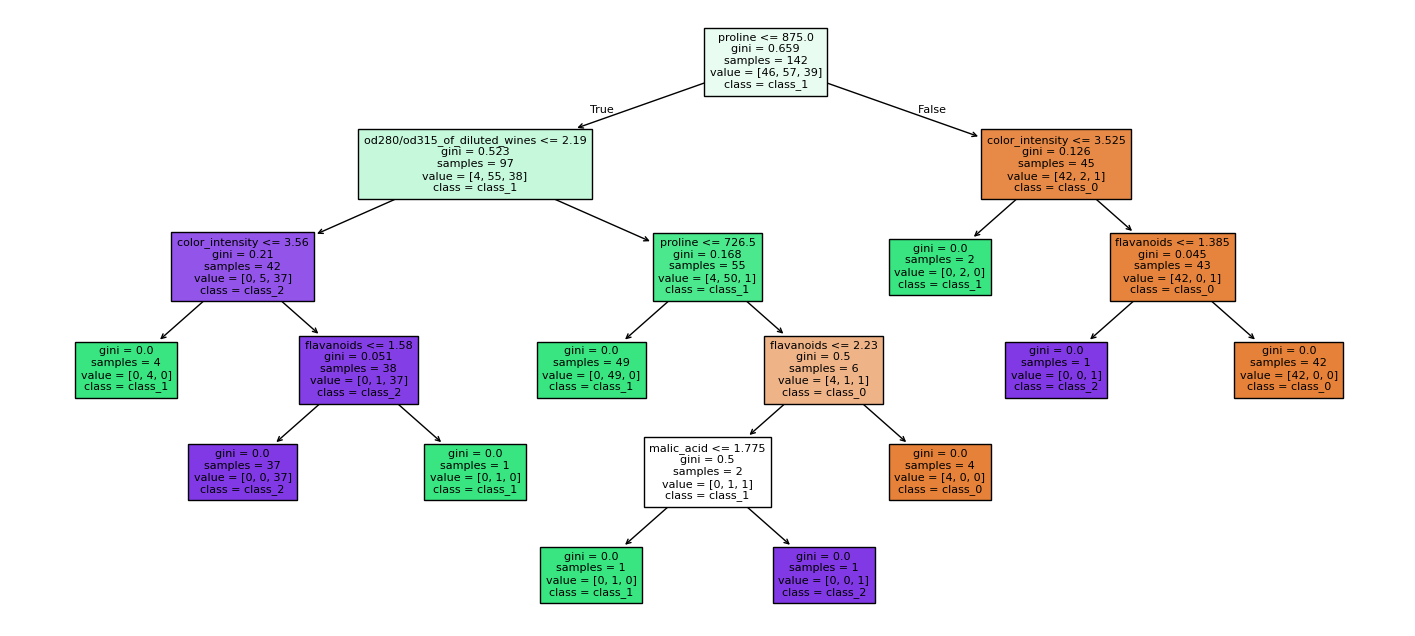

In [5]:
# Modify hyperparamters to create a refined decision tree classifier
refined_clf_dt = DecisionTreeClassifier()
refined_clf_dt.fit(X_train, y_train)

# Make predictions
new_predictions = refined_clf_dt.predict(X_test)

# Evaluate new model accuracy
new_accuracy = accuracy_score(y_test, new_predictions)
if new_accuracy-accuracy > 0:
    print(f'We improved the model accuracy by {round(new_accuracy-accuracy, 4)*100}% to {round(new_accuracy, 2)*100}%. Sweet!')
elif new_accuracy-accuracy < 0:
    print(f'We worsened the model accuracy by {round(accuracy-new_accuracy, 2)*100}% to {round(new_accuracy, 2)*100}%. Whoops!')
else:
    print("We didn't change the model's accuracy.")

# Plot the decision tree
plt.figure(figsize=(18, 8))
plot_tree(refined_clf_dt, feature_names=wine.feature_names, class_names=wine.target_names, filled=True, fontsize=8)
plt.show()

## How do we evaluate which model to use?

Each time we run the model, we create slightly different split points in the tree. You will see variation in the model's accuracy **even if you don't change hyperparameters**. Will the model that best predicts our training data best predict **any** new data? Advanced students can look into RandomForestClassifiers (https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html) that use a series of Decisions Trees to create a "best average" tree. For non-advanced users, run your model at least 10 times and record the accuracy for each. Try to make an argument for how well the model will handle new data based on how much variation in accuracy you see. 